## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 93](#Problem-93)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 93 <a name="Problem-93"></a>

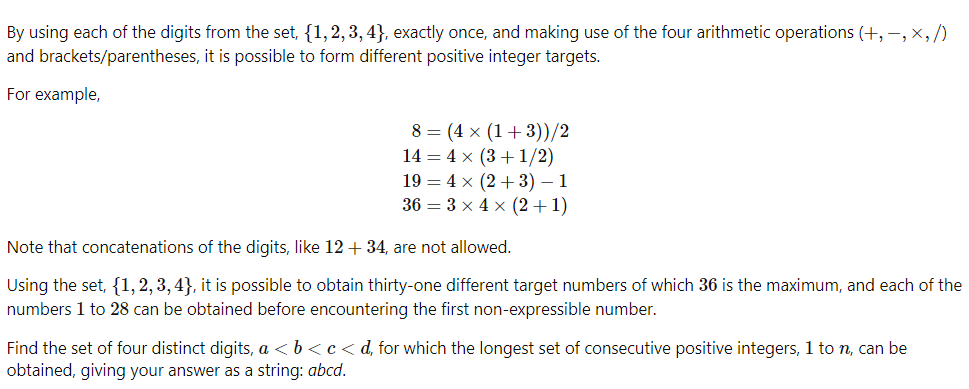

<br>
$**Hint**$

Use Recursive Approach for generate all possible operations

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from itertools import permutations, combinations  #generate permutations

## Main Solution <a name="Main-Solution"></a>



In [ ]:
start_time = time.time()

def possible(L):
    #When the length of the list is 1, the function should terminate
    if len(L) == 1:
        return set(L)

    result = set()
    for perm in permutations(L):
        # Generate all permutations of the given digits
        for i in range(1, len(perm)):
            # Generate all possible combinations for the first part of the permutation
            set1 = possible(perm[:i])
            # Generate all possible combinations for the second part of the permutation
            set2 = possible(perm[i:])
            for num1 in set1:
                for num2 in set2:
                    # Add the result of addition to the set
                    result.add(num1 + num2)
                    # Add the result of subtraction to the set
                    result.add(num1 - num2)
                    # Add the result of multiplication to the set
                    result.add(num1 * num2)
                    if num2 != 0:
                        # Add the result of division to the set (if denominator is not zero)
                        result.add(num1 / num2)

    return result


maximum = 0
# Generate combinations of four digits from the range 1 to 9
for combo in combinations(range(1, 10), 4):
    # Generate all possible expressions and filter out non-positive and non-integer results
    generated_set = sorted(filter(lambda x: x > 0 and int(x) == x, possible(combo)))
    for i in range(1, len(generated_set)):
        # Check if the current result is consecutive
        if generated_set[i - 1] != i:
            if i - 1 > maximum:
                maximum = i - 1
                digits = combo
            break

answer = str(digits[0]) + str(digits[1]) + str(digits[2]) + str(digits[3])

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 1258 
Execution time: 0.9624 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

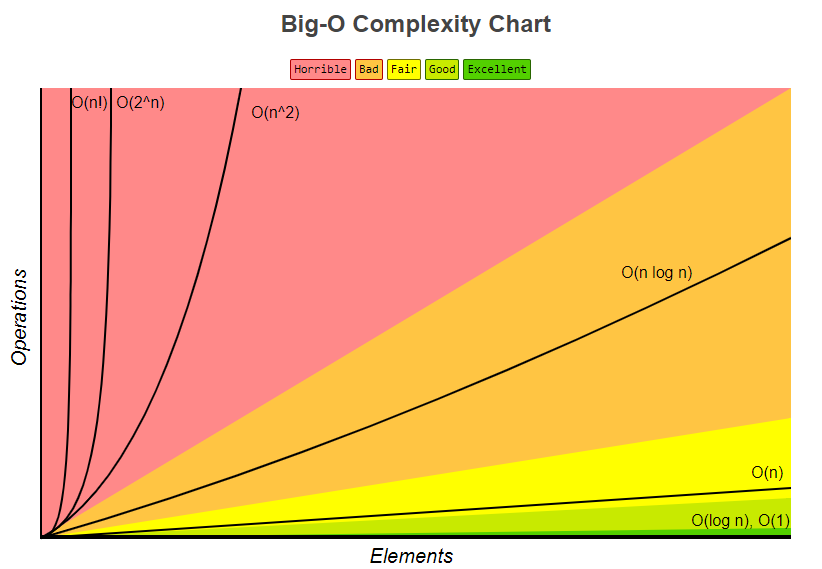

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
- Generating permutations: The `permutations` function from `itertools` generates all permutations of the given digits. The number of permutations of `n` digits is `n!` (factorial of `n`). Therefore, the time complexity of generating permutations is $O(n!)$.
- Recursive function: The `possible` function calls itself recursively for each permutation. Since the function generates all possible combinations of the digits, the number of recursive calls can be exponential. Therefore, the time complexity of the recursive function is also exponential.
- Sorting and Filtering: The generated expressions are sorted and filtered to remove non-positive and non-integer results. Sorting takes $O(k *log (k))$ time, where $k$ is the number of valid expressions. Filtering takes $O(k)$ time. As the number of expressions can vary, the time complexity for sorting and filtering is dependent on the number of valid expressions.

Overall, the **time complexity** of the code is dominated by the exponential complexity of generating permutations and the recursive function.

Space Complexity:
- Recursive function: The `possible` function uses a set, `result`, to store the generated expressions. The number of expressions can be exponential due to the recursive calls, resulting in exponential space usage.
- Sorting and Filtering: The `generated_set` list stores the valid expressions after filtering. The space complexity is determined by the number of valid expressions, which can vary.

In summary, the **space complexity** of the code is also dominated by the exponential space usage of the recursive function.